<a href="https://colab.research.google.com/github/Snehalwadile/Time-Series-Model/blob/main/Time%20series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

Training the model...
Epoch 1/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 15s 61ms/step - loss: 8.2964e-04
Epoch 2/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - loss: 1.4189e-05
Epoch 3/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - loss: 1.1748e-05
Epoch 4/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - loss: 1.2811e-05
Epoch 5/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - loss: 1.3517e-05
Epoch 6/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - loss: 1.1112e-05
Epoch 7/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - loss: 1.0790e-05
Epoch 8/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - loss: 1.2059e-05
Epoch 9/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - loss: 1.0308e-05
Epoch 10/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - loss: 1.2047e-05
Epoch 11/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - loss: 1.1468e-05
Epoch 12/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 1.2295e-05
Epoch 13/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - loss: 1.1882e-05
Epoch 14/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step - loss:

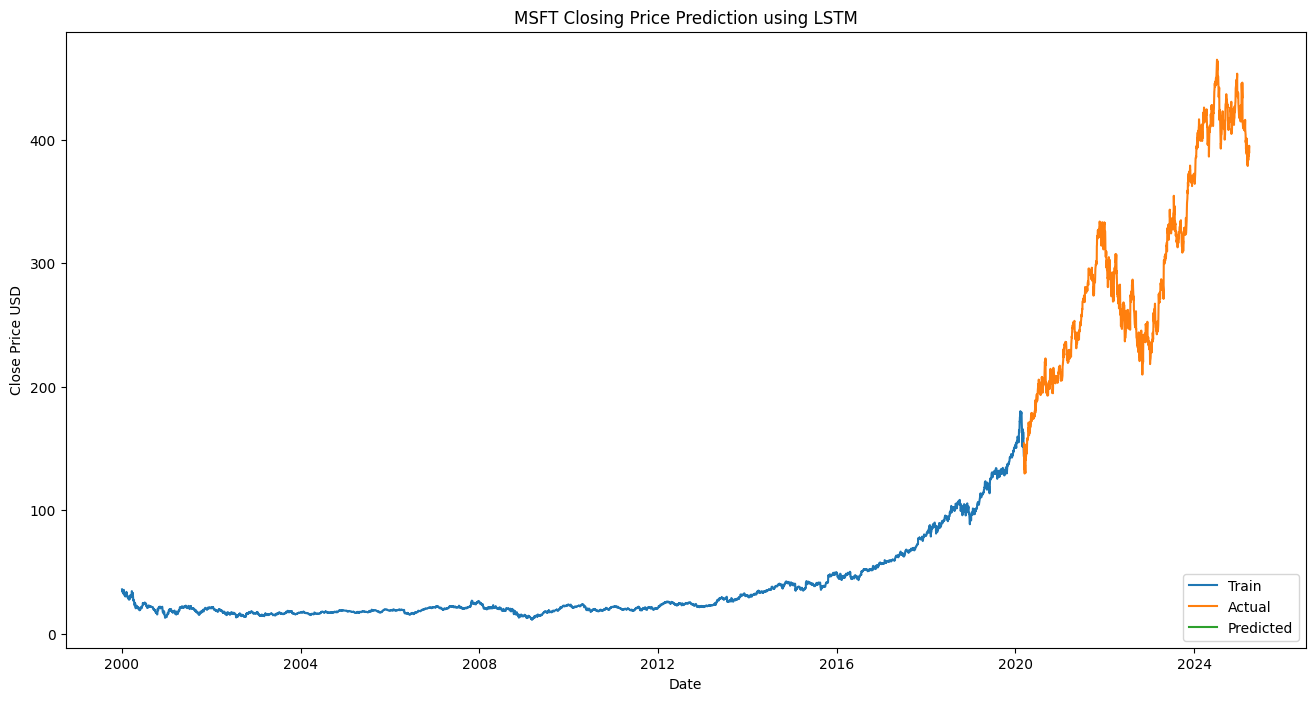

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error
import math
from datetime import datetime

# --- 1. Download Historical Data ---
ticker = "MSFT"
start_date = "2000-01-01"
# Use today's date as end date
end_date = datetime.today().strftime('%Y-%m-%d')
print(f"Downloading data for {ticker} from {start_date} to {end_date}...")
data = yf.download(ticker, start=start_date, end=end_date)

# Use the 'Close' price for forecasting
dataset = data[['Close']].values  # shape (n_samples, 1)

# --- 2. Data Preprocessing ---
# Scale data to range (0, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Split into training and testing sets (e.g., 80% training, 20% testing)
training_data_len = int(np.ceil(len(scaled_data) * 0.8))
train_data = scaled_data[0:training_data_len, :]

# Create a function to prepare the dataset with a sliding window
def create_dataset(dataset, time_step=60):
    X, y = [], []
    for i in range(time_step, len(dataset)):
        X.append(dataset[i - time_step:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

# Choose a look-back window (e.g., 60 days)
time_step = 60
X_train, y_train = create_dataset(train_data, time_step)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# --- 3. Build the LSTM Model ---
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# Train the model
epochs = 20
batch_size = 64
print("Training the model...")
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1)

# --- 4. Prepare Test Data & Make Predictions ---
# Create test dataset using the last 'time_step' days of training data as a starting point
test_data = scaled_data[training_data_len - time_step:, :]
X_test, y_test = create_dataset(test_data, time_step)

# Reshape X_test for the LSTM
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Get the model's predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Inverse transform y_test for evaluation (note: y_test was scaled)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE as evaluation metric
rmse = math.sqrt(mean_squared_error(y_test_inv, predictions))
print("Root Mean Squared Error (RMSE):", rmse)

# --- 5. Plot the Results ---
# Prepare data for plotting: training, validation, and predictions
train = data[:training_data_len]
valid = data[training_data_len:].copy()
valid['Predictions'] = np.nan

# Since predictions align with the test period, create a DataFrame for plotting
pred_df = pd.DataFrame(predictions, index=data.index[training_data_len:], columns=['Predictions'])
valid.update(pred_df)

plt.figure(figsize=(16, 8))
plt.title('MSFT Closing Price Prediction using LSTM')
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.plot(train['Close'], label='Train')
plt.plot(data[training_data_len:]['Close'], label='Actual')
plt.plot(valid['Predictions'], label='Predicted')
plt.legend(loc='lower right')
plt.show()
